<a href="https://colab.research.google.com/github/msfalif404/ta-classification-la/blob/main/New%20Language%20Anxiety%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Text Classification: Language Anxiety

## Installing Package

In [ ]:
!pip install xgboost lightgbm catboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.4 MB/s eta 0:00:00


## Importing Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_predict, StratifiedKFold, train_test_split, GridSearchCV

## Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC

## Utils
from sklearn.utils import shuffle, class_weight

## Text Representation
from sklearn.feature_extraction.text import TfidfVectorizer

## Model Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, f1_score, make_scorer, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## **Reading The Dataset**

In [ ]:
df = pd.read_excel('new_dataset_2class.xlsx')
df.drop(columns=['LA MEAN'], inplace=True)
df.head()

,post,q1,q2,q3,q4,q5,q6,q7,q8,q9,...,q23,q24,q25,q26,q27,q28,q29,q30,q31,LA Classification
0,The place I've been to that I love and always ...,4,3,4,3,3,5,3,3,3,...,2,3,1,2,2,2,1,1,2,Anxiety
1,"My favorite place is Hat Yai in Thailand, spec...",3,3,3,3,2,2,2,2,3,...,1,2,1,2,1,1,1,1,2,No Anxiety
2,One of my favorite places that i have been vis...,1,1,2,2,2,1,1,1,2,...,2,3,2,2,4,4,3,2,2,No Anxiety
3,"When I was in 6th grade, I went on a vacation ...",3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,Anxiety
4,"My favorite place is Bali, I like Bali so much...",3,3,3,3,3,4,3,2,3,...,3,3,3,3,3,4,4,4,4,Anxiety


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   post               324 non-null    object
 1   q1                 324 non-null    int64 
 2   q2                 324 non-null    int64 
 3   q3                 324 non-null    int64 
 4   q4                 324 non-null    int64 
 5   q5                 324 non-null    int64 
 6   q6                 324 non-null    int64 
 7   q7                 324 non-null    int64 
 8   q8                 324 non-null    int64 
 9   q9                 324 non-null    int64 
 10  q10                324 non-null    int64 
 11  q11                324 non-null    int64 
 12  q12                324 non-null    int64 
 13  q13                324 non-null    int64 
 14  q14                324 non-null    int64 
 15  q15                324 non-null    int64 
 16  q16                324 non-null    int64 
 1

## List Daftar Q1..31 Dengan Pertanyaan Aslinya

\begin{array}{|c|l|}
\hline
\textbf{No.} & \textbf{Pertanyaan} \\
\hline
Q1 & \text{Saya panik ketika harus berbicara dalam Bahasa Inggris} \\
Q2 & \text{Saya cenderung kehilangan kata-kata setiap kali harus berbicara dalam Bahasa Inggris} \\
Q3 & \text{Saya merasa tidak percaya diri setiap kali saya berbicara dalam Bahasa Inggris} \\
Q4 & \text{Saya gemetar ketika saya akan dipanggil untuk membacakan sesuatu di kelas bahasa Inggris} \\
Q5 & \text{Saya merasa gemetar hanya dengan memikirkan harus berbicara dalam Bahasa Inggris di depan kelas} \\
Q6 & \text{Saya takut Bahasa Inggris saya terdengar konyol} \\
Q7 & \text{Saya merasa takut dengan segala aktivitas yang menggunakan Bahasa Inggris} \\
Q8 & \text{Saya merasa kecewa ketika harus membuat sebuah tulisan dalam Bahasa Inggris} \\
Q9 & \text{Saya merasa tidak percaya diri dengan keahlian menulis saya dalam Bahasa Inggris} \\
Q10 & \text{Saya merasa gugup ketika menghadapi tes menulis dalam Bahasa Inggris} \\
Q11 & \text{Saya merasa takut dikoreksi ketika saya berbicara dalam Bahasa Inggris} \\
Q12 & \text{Saya khawatir komposisi bahasa Inggris saya akan dikritik} \\
Q13 & \text{Saya merasa malu melihat nilai buruk dari karangan Bahasa Inggris saya} \\
Q14 & \text{Saya takut teman-teman akan mengkritik hasil tulisan saya dalam Bahasa Inggris} \\
Q15 & \text{Saya merasa cemas tulisan saya dalam Bahasa Inggris akan tampak lucu} \\
Q16 & \text{Saya takut akan terdengar aneh ketika berbicara dengan orang asing} \\
Q17 & \text{Saya takut ketika harus berbicara dengan penutur asli Bahasa Inggris} \\
Q18 & \text{Saya takut menulis kepada penutur asli bahasa Inggris} \\
Q19 & \text{Saya menjadi gugup hanya dengan memikirkan harus berbicara kepada orang asing} \\
Q20 & \text{Saya merasa gemetar ketika harus berbicara dalam Bahasa Inggris dengan penutur asli Bahasa Inggris} \\
Q21 & \text{Saya merasa lebih rendah dari teman-teman sekelas saya dalam hal kemampuan bahasa Inggris} \\
Q22 & \text{Saya merasa tidak percaya diri dengan penampilan saya di kelas Bahasa Inggris} \\
Q23 & \text{Saya merasa saya tidak akan mendapatkan nilai bagus di kelas Bahasa Inggris} \\
Q24 & \text{Bahasa Inggris teman-teman sekelas saya lebih baik daripada saya} \\
Q25 & \text{Saya merasa saya akan gagal di kelas Bahasa Inggris} \\
Q26 & \text{Saya merasa lebih rendah dari teman-teman sekelas saya dalam hal kemampuan bahasa Inggris} \\
Q27 & \text{Saya takut saya tidak benar-benar memahami materi dalam Bahasa Inggris yang saya baca} \\
Q28 & \text{Saya takut saya tidak memahami secara akurat materi dalam Bahasa Inggris yang saya dengar} \\
Q29 & \text{Saya takut saya tidak memahami petunjuk yang ditulis dalam Bahasa Inggris} \\
Q30 & \text{Saya takut saya tidak memahami diskusi dalam Bahasa Inggris} \\
Q31 & \text{Saya takut saya tidak dapat memberikan informasi secara detail dari materi dalam Bahasa Inggris yang saya baca} \\
\hline
\end{array}

## Checking Class Distribution

LA Classification
Anxiety       241
No Anxiety     83
Name: count, dtype: int64



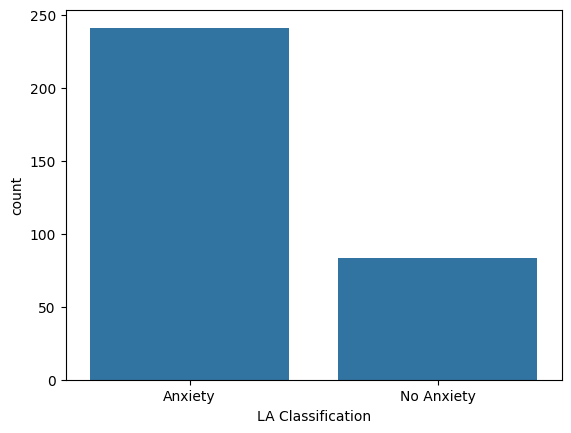

In [ ]:
print(df['LA Classification'].value_counts())
print()

# create LA Classification visualization
sns.countplot(x='LA Classification', data=df)
plt.show()

## **Encode The Target Variable**

In [ ]:
# Menggunakan mapping manual dengan map
df['la_class'] = df['LA Classification'].map({'Anxiety': 1, 'No Anxiety': 0})

# Menampilkan hasil
print("Mapping kelas ke nilai encoded:")
print(df[['LA Classification', 'la_class']])

# Menghapus kolom asli
df.drop(columns=['LA Classification'], inplace=True)

Mapping kelas ke nilai encoded:
    LA Classification  la_class
0             Anxiety         1
1          No Anxiety         0
2          No Anxiety         0
3             Anxiety         1
4             Anxiety         1
..                ...       ...
319           Anxiety         1
320           Anxiety         1
321           Anxiety         1
322           Anxiety         1
323           Anxiety         1

[324 rows x 2 columns]


In [ ]:
df.head()

,post,q1,q2,q3,q4,q5,q6,q7,q8,q9,...,q23,q24,q25,q26,q27,q28,q29,q30,q31,la_class
0,The place I've been to that I love and always ...,4,3,4,3,3,5,3,3,3,...,2,3,1,2,2,2,1,1,2,1
1,"My favorite place is Hat Yai in Thailand, spec...",3,3,3,3,2,2,2,2,3,...,1,2,1,2,1,1,1,1,2,0
2,One of my favorite places that i have been vis...,1,1,2,2,2,1,1,1,2,...,2,3,2,2,4,4,3,2,2,0
3,"When I was in 6th grade, I went on a vacation ...",3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1
4,"My favorite place is Bali, I like Bali so much...",3,3,3,3,3,4,3,2,3,...,3,3,3,3,3,4,4,4,4,1


## Correlation Matrix

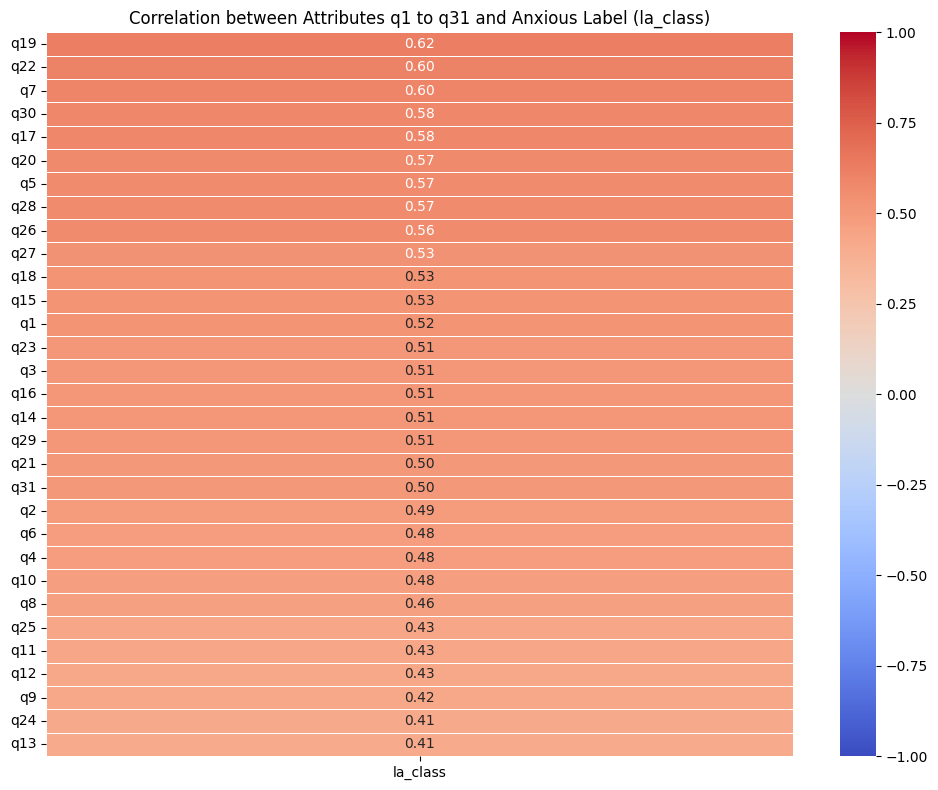

In [ ]:
# Ambil atribut q1 hingga q31 dan label la_class
features = df.iloc[:, 1:32]  # Atribut q1 hingga q31
features['la_class'] = df.iloc[:, -1]  # Tambahkan label ke DataFrame

# Hitung matrix korelasi
correlation_matrix = features.corr()

# Ambil korelasi antara atribut q1 hingga q31 dan label la_class
correlation_with_label = correlation_matrix[['la_class']].iloc[:-1]  # Hilangkan baris untuk 'la_class' itu sendiri

# Urutkan berdasarkan nilai korelasi dengan label dari yang terbesar
correlation_with_label = correlation_with_label.sort_values(by='la_class', ascending=False)

# Visualisasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_label, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation between Attributes q1 to q31 and Anxious Label (la_class)')
plt.tight_layout()
plt.show()

## Text Preprocessing

### Contraction Mapping

In [ ]:
contraction_mapping = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how does",
    "I'd": "I had",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

def expand_contractions(text, contraction_mapping):
    for contraction, expanded in contraction_mapping.items():
        text = text.replace(contraction, expanded)
    return text

df['post'] = df['post'].apply(lambda x: expand_contractions(x, contraction_mapping))

### Text Cleaning

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Hapus karakter non-alphanumeric
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Konversi teks ke huruf kecil
    text = text.lower()
    # Split teks menjadi kata-kata
    words = text.split()
    # Lematisasi dan hapus stop words
    words = [lemmatizer.lemmatize(word) for word in words]
    # Gabungkan kata-kata kembali menjadi satu string
    processed_text = ' '.join(words)

    return processed_text

df['post'] = df['post'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Feature Extraction

In [ ]:
import gensim.downloader as api

# Download the pre-trained Word2Vec model (you can choose a different one)
wv = api.load('word2vec-google-news-300')

def get_word_vector(word):
  try:
    return wv[word]
  except KeyError:
    return np.zeros(300)

def document_vector(document):
  words = document.split()
  word_vectors = [get_word_vector(word) for word in words]
  return np.mean(word_vectors, axis=0)

df['post'] = df['post'].apply(document_vector)
df.head()

[==================================================] 100.0% 1662.8/1662.8MB downloaded


,post,q1,q2,q3,q4,q5,q6,q7,q8,q9,...,q23,q24,q25,q26,q27,q28,q29,q30,q31,la_class
0,"[0.021936312588778407, 0.015025121515447442, 0...",4,3,4,3,3,5,3,3,3,...,2,3,1,2,2,2,1,1,2,1
1,"[0.006177629743303571, 0.02505609586641386, 0....",3,3,3,3,2,2,2,2,3,...,1,2,1,2,1,1,1,1,2,0
2,"[0.04403342519487653, 0.029025273663657054, 0....",1,1,2,2,2,1,1,1,2,...,2,3,2,2,4,4,3,2,2,0
3,"[0.017697970072428387, 0.035642975852603, 0.03...",3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1
4,"[0.028209735820819804, 0.015391089699485085, 0...",3,3,3,3,3,4,3,2,3,...,3,3,3,3,3,4,4,4,4,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   post      324 non-null    object
 1   q1        324 non-null    int64 
 2   q2        324 non-null    int64 
 3   q3        324 non-null    int64 
 4   q4        324 non-null    int64 
 5   q5        324 non-null    int64 
 6   q6        324 non-null    int64 
 7   q7        324 non-null    int64 
 8   q8        324 non-null    int64 
 9   q9        324 non-null    int64 
 10  q10       324 non-null    int64 
 11  q11       324 non-null    int64 
 12  q12       324 non-null    int64 
 13  q13       324 non-null    int64 
 14  q14       324 non-null    int64 
 15  q15       324 non-null    int64 
 16  q16       324 non-null    int64 
 17  q17       324 non-null    int64 
 18  q18       324 non-null    int64 
 19  q19       324 non-null    int64 
 20  q20       324 non-null    int64 
 21  q21       324 no

## Splitting The Data

In [ ]:
X = df.drop('la_class', axis=1)
y = df['la_class']

In [ ]:
post_vectors = np.array(X['post'].tolist())
q_features = X.iloc[:, 1:32].values
X_combined = np.hstack((q_features, post_vectors))

## Defining Models

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(class_weight='balanced'),
    "XGBoost": XGBClassifier(scale_pos_weight=(len(y) - sum(y)) / sum(y)),
    "LightGBM": LGBMClassifier(scale_pos_weight=(len(y) - sum(y)) / sum(y)),
    "CatBoost": CatBoostClassifier(
        iterations=1000,
        learning_rate=0.05,
        depth=6,
        scale_pos_weight=(len(y) - sum(y)) / sum(y),
        task_type="GPU"
    )
}

## Defining Cross Validation

In [ ]:
cv = StratifiedKFold(n_splits=5)

## Calculating Each Model Performance

In [ ]:
results = []
for model_name, model in models.items():
    accuracy_scores = cross_val_score(model, X_combined, y, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(model, X_combined, y, cv=cv, scoring='precision')
    recall_scores = cross_val_score(model, X_combined, y, cv=cv, scoring='recall')
    f1_scores = cross_val_score(model, X_combined, y, cv=cv, scoring='f1')

    results.append({
        'Model': model_name,
        'Accuracy': accuracy_scores.mean(),
        'Precision': precision_scores.mean(),
        'Recall': recall_scores.mean(),
        'F1-score': f1_scores.mean()
    })

results_df = pd.DataFrame(results)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.6280231	total: 37.3ms	remaining: 37.3s
1:	learn: 0.5824750	total: 74.9ms	remaining: 37.4s
2:	learn: 0.5404545	total: 111ms	remaining: 36.8s
3:	learn: 0.5128170	total: 155ms	remaining: 38.5s
4:	learn: 0.4746979	total: 193ms	remaining: 38.4s
5:	learn: 0.4392230	total: 229ms	remaining: 37.9s
6:	learn: 0.4211770	total: 278ms	remaining: 39.5s
7:	learn: 0.3931935	total: 309ms	remaining: 38.4s
8:	learn: 0.3775813	total: 345ms	remaining: 38s
9:	learn: 0.3656806	total: 381ms	remaining: 37.7s
10:	learn: 0.3489935	total: 416ms	remaining: 37.4s
11:	learn: 0.3277525	total: 454ms	remaining: 37.4s
12:	learn: 0.3119545	total: 499ms	remaining: 37.9s
13:	learn: 0.2975623	total: 536ms	remaining: 37.8s
14:	learn: 0.2817643	total: 578ms	remaining: 38s
15:	learn: 0.2667964	total: 615ms	remaining: 37.8s
16:	learn: 0.2563995	total: 652ms	remaining: 37.7s
17:	learn: 0.2467771	total: 690ms	remaining: 37.6s
18:	learn: 0.2373618	total: 738ms	remaining

In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.978413,0.991833,0.979167,0.985347
1,Decision Tree,0.830240,0.887816,0.871599,0.887822
2,Random Forest,0.904471,0.890065,0.995833,0.937774
3,Naive Bayes,0.907308,0.960666,0.912670,0.935579
4,SVM,0.981442,1.000000,0.975000,0.987279
5,XGBoost,0.947596,0.955657,0.975085,0.965194
6,LightGBM,0.935192,0.947409,0.966752,0.956904
7,CatBoost,0.944423,0.956627,0.970918,0.963335


## Model Performances Visualization

### Accuracy

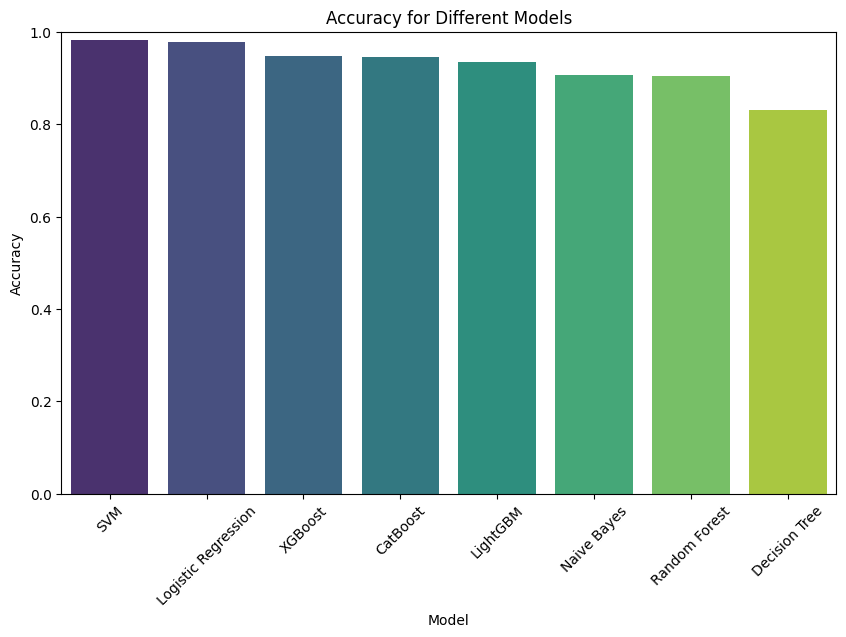

In [ ]:
plt.figure(figsize=(10, 6))
sorted_df = results_df.sort_values(by='Accuracy', ascending=False)
sns.barplot(x='Model', y='Accuracy', data=sorted_df, palette='viridis')
plt.title('Accuracy for Different Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

### Precision

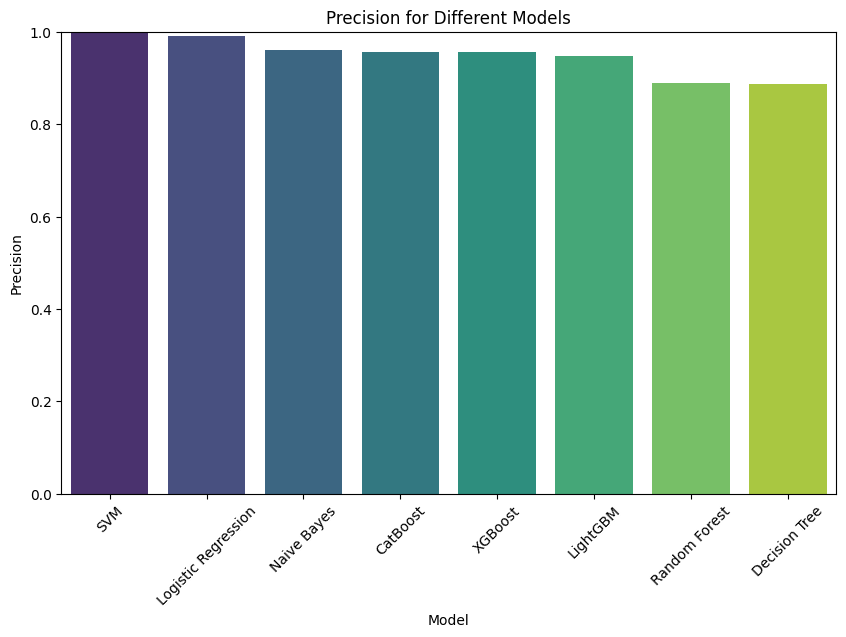

In [ ]:
plt.figure(figsize=(10, 6))
sorted_df = results_df.sort_values(by='Precision', ascending=False)
sns.barplot(x='Model', y='Precision', data=sorted_df, palette='viridis')
plt.title('Precision for Different Models')
plt.ylabel('Precision')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

### Recall

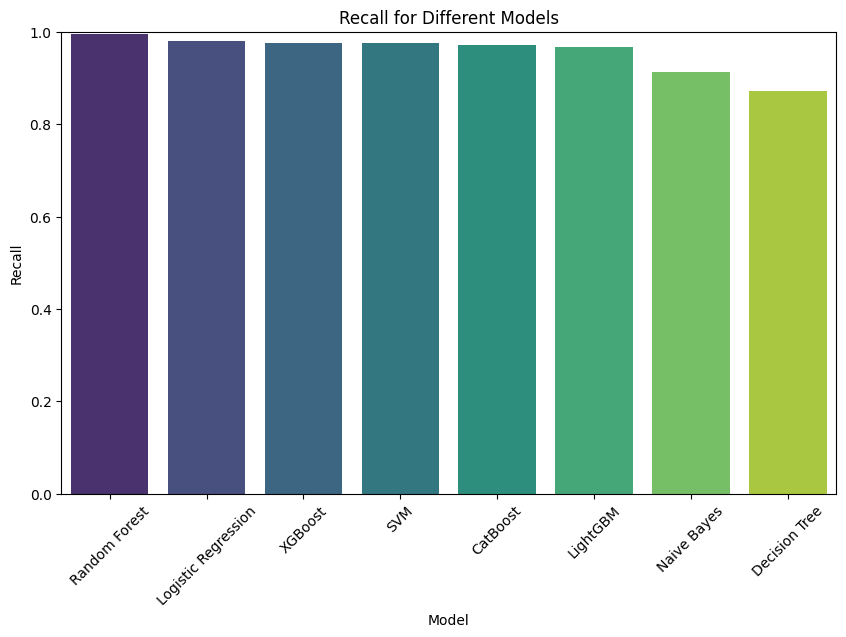

In [ ]:
plt.figure(figsize=(10, 6))
sorted_df = results_df.sort_values(by='Recall', ascending=False)
sns.barplot(x='Model', y='Recall', data=sorted_df, palette='viridis')
plt.title('Recall for Different Models')
plt.ylabel('Recall')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

### F1-score

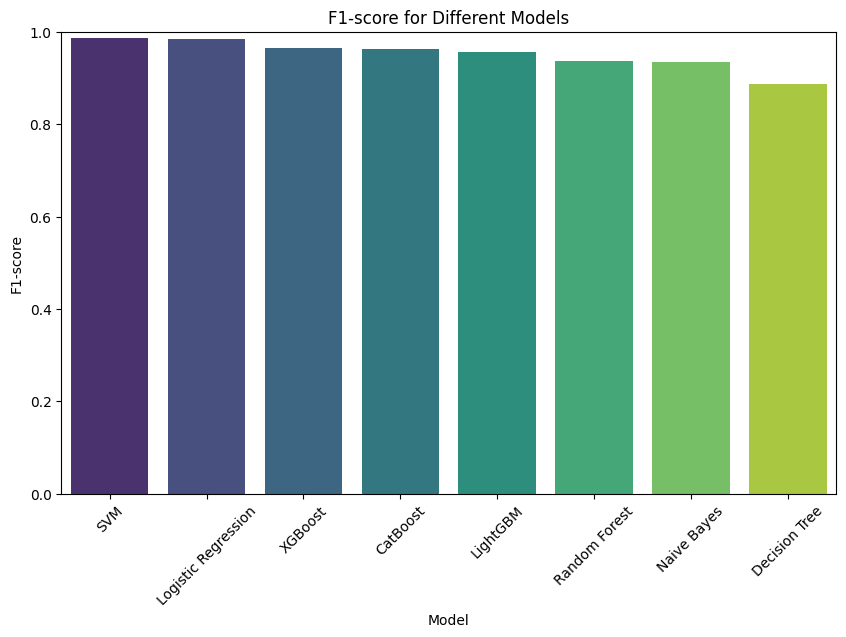

In [ ]:
plt.figure(figsize=(10, 6))
sorted_df = results_df.sort_values(by='F1-score', ascending=False)
sns.barplot(x='Model', y='F1-score', data=sorted_df, palette='viridis')
plt.title('F1-score for Different Models')
plt.ylabel('F1-score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

## Feature Importances

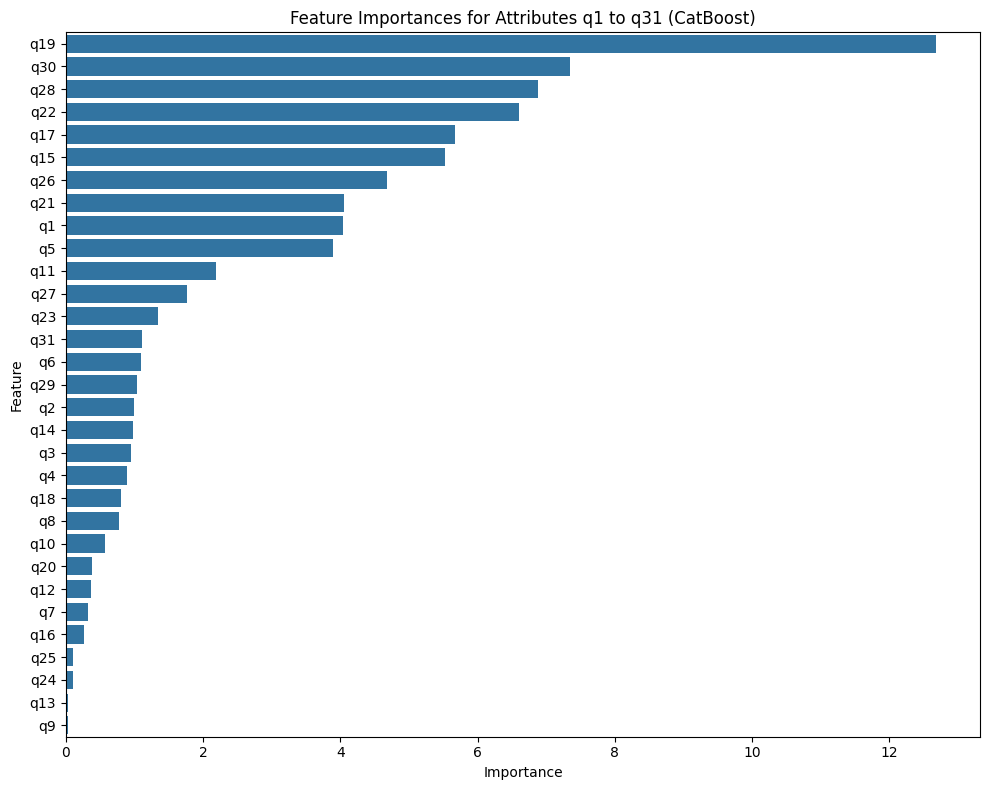

In [ ]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.25, random_state=42, stratify=y)

# Melatih CatBoostClassifier
catboost_model = CatBoostClassifier(
        iterations=1000,
        learning_rate=0.05,
        depth=6,
        scale_pos_weight=(len(y) - sum(y)) / sum(y),
        task_type="GPU",
        random_state = 42,
        silent=True
    )
catboost_model.fit(X_train, y_train)

# Mendapatkan feature importances
importances = catboost_model.get_feature_importance()

# Hanya memilih atribut q1 hingga q31
features = ['q' + str(i) for i in range(1, 32)]
importances_q_features = importances[:31]  # Hanya untuk q1 sampai q31

# Membuat DataFrame untuk visualisasi
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances_q_features})

# Mengurutkan feature importances
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Membuat visualisasi feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances for Attributes q1 to q31 (CatBoost)')
plt.tight_layout()
plt.show()

In [ ]:
feature_importances

,Feature,Importance
18,q19,12.686573
29,q30,7.341545
27,q28,6.877361
21,q22,6.601547
16,q17,5.674453
14,q15,5.527244
25,q26,4.679141
20,q21,4.051163
0,q1,4.036416
4,q5,3.895234


## SVM Hyperparameter Tuning

In [ ]:
# Definisikan parameter yang akan diuji
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Inisialisasi model SVM
svm_model = SVC(class_weight='balanced')

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1')

# Lakukan pencarian grid pada data training
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

print()

# Cetak skor F1 terbaik
print("Skor F1 terbaik:", grid_search.best_score_)

# Evaluasi model terbaik pada data testing
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

Parameter terbaik: {'C': 0.1, 'kernel': 'linear'}

Skor F1 terbaik: 0.9859121854414156
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       1.00      0.93      0.97        60

    accuracy                           0.95        81
   macro avg       0.92      0.97      0.94        81
weighted avg       0.96      0.95      0.95        81



## Feature Selection

### Top 5

In [ ]:
# Memilih 5 fitur teratas
top_n = 5
top_features = feature_importances.head(top_n)['Feature'].tolist()

# Membuat subset dari data berdasarkan fitur-fitur terpilih
selected_indices = [features.index(f) for f in top_features]
X_train_selected = X_train[:, selected_indices]
X_test_selected = X_test[:, selected_indices]

# Definisikan parameter yang akan diuji
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Inisialisasi model SVM
svm_model = SVC(class_weight='balanced')

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1')

# Lakukan pencarian grid pada data training yang sudah dipilih fiturnya
grid_search.fit(X_train_selected, y_train)

# Cetak parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Cetak skor F1 terbaik
print("Skor F1 terbaik:", grid_search.best_score_)

# Evaluasi model terbaik pada data testing
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_selected)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Parameter terbaik: {'C': 0.1, 'kernel': 'linear'}
Skor F1 terbaik: 0.9634361592758189
Accuracy: 0.8765432098765432
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.95      0.80        21
           1       0.98      0.85      0.91        60

    accuracy                           0.88        81
   macro avg       0.84      0.90      0.86        81
weighted avg       0.91      0.88      0.88        81



### Top 10

In [ ]:
# Memilih 10 fitur teratas
top_n = 10
top_features = feature_importances.head(top_n)['Feature'].tolist()

# Membuat subset dari data berdasarkan fitur-fitur terpilih
selected_indices = [features.index(f) for f in top_features]
X_train_selected = X_train[:, selected_indices]
X_test_selected = X_test[:, selected_indices]

# Definisikan parameter yang akan diuji
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Inisialisasi model SVM
svm_model = SVC(class_weight='balanced')

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1')

# Lakukan pencarian grid pada data training yang sudah dipilih fiturnya
grid_search.fit(X_train_selected, y_train)

# Cetak parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Cetak skor F1 terbaik
print("Skor F1 terbaik:", grid_search.best_score_)

# Evaluasi model terbaik pada data testing
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_selected)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Parameter terbaik: {'C': 10, 'kernel': 'linear'}
Skor F1 terbaik: 0.9888888888888889
Accuracy: 0.9259259259259259
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        21
           1       1.00      0.90      0.95        60

    accuracy                           0.93        81
   macro avg       0.89      0.95      0.91        81
weighted avg       0.94      0.93      0.93        81



### Top 15

In [ ]:
# Memilih 15 fitur teratas
top_n = 15
top_features = feature_importances.head(top_n)['Feature'].tolist()

# Membuat subset dari data berdasarkan fitur-fitur terpilih
selected_indices = [features.index(f) for f in top_features]
X_train_selected = X_train[:, selected_indices]
X_test_selected = X_test[:, selected_indices]

# Definisikan parameter yang akan diuji
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Inisialisasi model SVM
svm_model = SVC(class_weight='balanced')

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1')

# Lakukan pencarian grid pada data training yang sudah dipilih fiturnya
grid_search.fit(X_train_selected, y_train)

# Cetak parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Cetak skor F1 terbaik
print("Skor F1 terbaik:", grid_search.best_score_)

# Evaluasi model terbaik pada data testing
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_selected)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Parameter terbaik: {'C': 10, 'kernel': 'linear'}
Skor F1 terbaik: 0.994443372564152
Accuracy: 0.9382716049382716
Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        21
           1       1.00      0.92      0.96        60

    accuracy                           0.94        81
   macro avg       0.90      0.96      0.93        81
weighted avg       0.95      0.94      0.94        81



### Top 20

In [ ]:
# Memilih 20 fitur teratas
top_n = 20
top_features = feature_importances.head(top_n)['Feature'].tolist()

# Membuat subset dari data berdasarkan fitur-fitur terpilih
selected_indices = [features.index(f) for f in top_features]
X_train_selected = X_train[:, selected_indices]
X_test_selected = X_test[:, selected_indices]

# Definisikan parameter yang akan diuji
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Inisialisasi model SVM
svm_model = SVC(class_weight='balanced')

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1')

# Lakukan pencarian grid pada data training yang sudah dipilih fiturnya
grid_search.fit(X_train_selected, y_train)

# Cetak parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Cetak skor F1 terbaik
print("Skor F1 terbaik:", grid_search.best_score_)

# Evaluasi model terbaik pada data testing
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_selected)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Parameter terbaik: {'C': 10, 'kernel': 'linear'}
Skor F1 terbaik: 0.9916264711557015
Accuracy: 0.9506172839506173
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       1.00      0.93      0.97        60

    accuracy                           0.95        81
   macro avg       0.92      0.97      0.94        81
weighted avg       0.96      0.95      0.95        81



### Top 25

In [ ]:
# Memilih 25 fitur teratas
top_n = 25
top_features = feature_importances.head(top_n)['Feature'].tolist()

# Membuat subset dari data berdasarkan fitur-fitur terpilih
selected_indices = [features.index(f) for f in top_features]
X_train_selected = X_train[:, selected_indices]
X_test_selected = X_test[:, selected_indices]

# Definisikan parameter yang akan diuji
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Inisialisasi model SVM
svm_model = SVC(class_weight='balanced')

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1')

# Lakukan pencarian grid pada data training yang sudah dipilih fiturnya
grid_search.fit(X_train_selected, y_train)

# Cetak parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Cetak skor F1 terbaik
print("Skor F1 terbaik:", grid_search.best_score_)

# Evaluasi model terbaik pada data testing
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_selected)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Parameter terbaik: {'C': 0.1, 'kernel': 'rbf'}
Skor F1 terbaik: 0.9916264711557012
Accuracy: 0.9506172839506173
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       1.00      0.93      0.97        60

    accuracy                           0.95        81
   macro avg       0.92      0.97      0.94        81
weighted avg       0.96      0.95      0.95        81

